# Find some relationship between Nicaragua, Panama, Virgin Islands cases with weather 

In [53]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import datetime

import matplotlib.style as style
%matplotlib inline
style.use('seaborn-whitegrid')

import warnings
warnings.simplefilter("ignore")

pd.pandas.set_option('display.max_columns',None)

# Weather

In [2]:
weather = pd.read_csv('weatherdataset.csv')

# Convert our report_date columns to datetime datatype
weather['date_time'] = pd.to_datetime(weather['date_time'], format="%Y-%m-%d")

# create new year and month column from datetime
weather['year'] = pd.DatetimeIndex(weather['date_time']).year
weather['month'] = pd.DatetimeIndex(weather['date_time']).month
weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
0,2016-03-19,22,13,0.0,11.6,5,73,05:01 PM,03:19 AM,06:57 AM,07:07 PM,9,17,18,17,36,10,58,0.0,1023,22,10,125,27,Argentina,2016,3
1,2016-03-20,22,16,0.0,11.6,5,80,05:38 PM,04:15 AM,06:58 AM,07:05 PM,10,19,19,19,29,22,58,0.1,1022,22,10,95,21,Argentina,2016,3
2,2016-03-21,24,17,0.0,10.3,5,87,06:11 PM,05:10 AM,06:59 AM,07:04 PM,14,20,21,20,20,58,69,3.4,1017,24,10,95,15,Argentina,2016,3
3,2016-03-22,28,19,0.0,11.6,6,94,06:44 PM,06:05 AM,07:00 AM,07:02 PM,16,24,24,23,11,2,65,0.0,1016,28,10,117,8,Argentina,2016,3
4,2016-03-23,30,17,0.0,11.6,6,100,07:16 PM,06:59 AM,07:01 AM,07:01 PM,14,24,24,23,19,2,60,0.0,1015,30,10,139,14,Argentina,2016,3


# Zika virus

In [3]:
zika = pd.read_csv('zikavirus_dataset.csv')
zika.head()

,report_date,location,location_type,data_field,cases
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2.0


In [4]:
zika = zika.dropna(how = 'all')
zika.drop(zika[zika['report_date'] == '18437'].index, inplace = True)
zika['cases'] = zika['cases'].astype(float)
zika['cases'] = zika['cases'].fillna(0)
zika['cases'] = zika['cases'].astype(int)
zika['report_date'] = pd.to_datetime(zika['report_date'], format="%Y-%m-%d")
zika['year'] = pd.DatetimeIndex(zika['report_date']).year
zika['month'] = pd.DatetimeIndex(zika['report_date']).month

In [5]:
zika.head()

,report_date,location,location_type,data_field,cases,year,month
0,2017-01-12,Argentina-Buenos_Aires,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
1,2017-01-12,Argentina-CABA,province,cumulative_confirmed_imported_cases,1,2017.0,1.0
2,2017-01-12,Argentina-Cordoba,province,cumulative_confirmed_imported_cases,2,2017.0,1.0
3,2017-01-12,Argentina-Entre_Rios,province,cumulative_confirmed_imported_cases,0,2017.0,1.0
4,2017-01-12,Argentina-Santa_Fe,province,cumulative_confirmed_imported_cases,2,2017.0,1.0


# 1. Nicaragua

In [6]:
nicaragua_weather = weather[weather['location'] == 'Nicaragua']
nicaragua_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
4648,2016-02-09,33,23,0.0,8.7,7,4,06:53 AM,07:05 PM,06:09 AM,05:50 PM,16,28,28,27,35,21,52,0.0,1014,33,10,65,26,Nicaragua,2016,2
4649,2016-02-10,32,22,0.0,8.7,7,12,07:44 AM,08:03 PM,06:08 AM,05:50 PM,14,27,27,26,39,18,49,0.0,1015,32,10,60,29,Nicaragua,2016,2
4650,2016-02-11,33,22,0.0,8.7,7,19,08:33 AM,09:01 PM,06:08 AM,05:51 PM,15,28,28,26,38,18,52,0.0,1014,33,10,66,29,Nicaragua,2016,2
4651,2016-02-12,34,23,0.0,8.7,7,27,09:23 AM,09:59 PM,06:08 AM,05:51 PM,17,29,29,28,39,15,54,0.0,1013,34,10,65,29,Nicaragua,2016,2
4652,2016-02-13,35,23,0.0,8.7,8,34,10:12 AM,10:56 PM,06:07 AM,05:51 PM,18,30,30,28,42,13,56,0.0,1012,35,10,60,31,Nicaragua,2016,2


In [7]:
nicaragua_weather = nicaragua_weather[['date_time','maxtempC','precipMM','humidity']]
nicaragua_weather

,date_time,maxtempC,precipMM,humidity
4648,2016-02-09,33,0.0,52
4649,2016-02-10,32,0.0,49
4650,2016-02-11,33,0.0,52
4651,2016-02-12,34,0.0,54
4652,2016-02-13,35,0.0,56
...,...,...,...,...
4868,2016-09-16,32,2.3,81
4869,2016-09-17,32,2.1,78
4870,2016-09-18,32,1.0,78
4871,2016-09-19,32,0.7,77


In [8]:
nicaragua_zika = zika[zika["location"].str.startswith("Nicaragua")]
nicLocal = nicaragua_zika[nicaragua_zika['data_field'] == 'total_zika_confirmed']
nicaragua_monthly = nicLocal.groupby(['report_date']).cases.agg([sum])
nicaragua_monthly = nicaragua_monthly.reset_index()
nicaragua_monthly = nicaragua_monthly.rename(columns={"report_date": "date_time"})
nicaragua_monthly.head()

,date_time,sum
0,2016-02-09,6
1,2016-02-11,8
2,2016-02-12,11
3,2016-02-15,27
4,2016-02-16,2


In [9]:
weather_case = pd.merge(nicaragua_monthly,nicaragua_weather, on=['date_time'], how='left') 
weather_case.head()

,date_time,sum,maxtempC,precipMM,humidity
0,2016-02-09,6,33,0.0,52
1,2016-02-11,8,33,0.0,52
2,2016-02-12,11,34,0.0,54
3,2016-02-15,27,34,0.1,60
4,2016-02-16,2,36,0.0,59


Text(0.5, 1.0, 'Humidity')

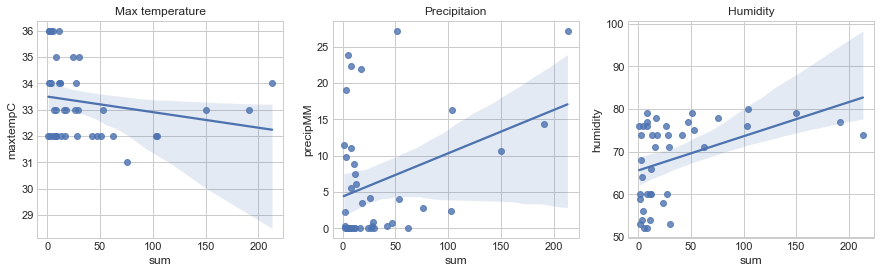

In [57]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=weather_case['maxtempC'], x=weather_case['sum'])
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=weather_case['precipMM'], x=weather_case['sum'])
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=weather_case['humidity'], x=weather_case['sum'])
axes[2].set_title('Humidity')

<AxesSubplot:>

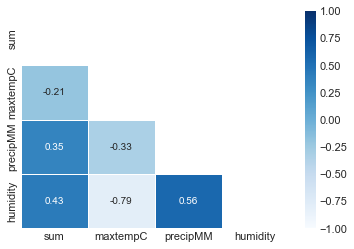

In [67]:
matrix = np.triu(weather_case.corr())
sns.heatmap(weather_case.corr(),annot=True,vmax=1,vmin=-1, mask=matrix, linewidths=.5 , cmap='Blues')
# sns.heatmap(weather_case_panama.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, linewidths=.5) 

In Nicaragua, number of cases are more in highly precipitated areas.

# 2. Panama


In [12]:
panama_weather = weather[weather['location'] == 'Panama']
panama_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
4873,2016-01-06,30,25,0.0,11.6,6,14,03:26 AM,03:28 PM,06:35 AM,06:12 PM,24,30,30,27,15,49,82,7.2,1012,30,9,343,10,Panama,2016,1
4874,2016-01-07,31,25,0.0,8.7,6,7,04:17 AM,04:17 PM,06:35 AM,06:13 PM,23,30,30,27,13,49,79,0.6,1011,31,10,301,8,Panama,2016,1
4875,2016-01-08,31,25,0.0,8.7,6,0,05:10 AM,05:10 PM,06:36 AM,06:14 PM,23,30,30,27,12,54,79,0.2,1011,31,10,298,8,Panama,2016,1
4876,2016-01-09,31,25,0.0,10.2,6,0,06:03 AM,06:05 PM,06:36 AM,06:14 PM,22,30,30,27,13,49,77,0.2,1011,31,10,253,8,Panama,2016,1
4877,2016-01-10,31,24,0.0,11.6,6,0,06:57 AM,07:01 PM,06:36 AM,06:15 PM,22,29,29,26,14,31,78,0.2,1012,31,10,255,9,Panama,2016,1


In [13]:
panama_weather = panama_weather[['date_time','maxtempC','precipMM','humidity']]
panama_weather

,date_time,maxtempC,precipMM,humidity
4873,2016-01-06,30,7.2,82
4874,2016-01-07,31,0.6,79
4875,2016-01-08,31,0.2,79
4876,2016-01-09,31,0.2,77
4877,2016-01-10,31,0.2,78
...,...,...,...,...
5590,2017-12-23,31,0.5,82
5591,2017-12-24,30,3.8,83
5592,2017-12-25,28,7.1,87
5593,2017-12-26,29,1.2,81


In [14]:
panama_zika = zika[zika["location"].str.startswith("Panama")]
panLocal = panama_zika[panama_zika['data_field'] == 'weekly_Zika_confirmed_local']
panama_monthly = panLocal.groupby(['report_date']).cases.agg([sum])
panama_monthly = panama_monthly.reset_index()
panama_monthly = panama_monthly.rename(columns={"report_date": "date_time"})
panama_monthly.head()


,date_time,sum
0,2016-02-19,33
1,2016-03-01,50
2,2016-03-07,58
3,2016-03-17,70
4,2016-03-21,84


In [15]:
weather_case_panama = pd.merge(panama_monthly,panama_weather, on=['date_time'], how='left') 
weather_case_panama

,date_time,sum,maxtempC,precipMM,humidity
0,2016-02-19,33,30,0.0,73
1,2016-03-01,50,30,1.5,77
2,2016-03-07,58,33,0.0,76
3,2016-03-17,70,32,1.1,76
4,2016-03-21,84,30,2.2,79
5,2016-03-28,92,31,0.0,76
6,2016-04-04,110,33,0.0,71
7,2016-04-11,120,32,0.3,69
8,2016-04-18,140,30,4.9,82
9,2016-05-10,145,30,21.3,79


Text(0.5, 1.0, 'Humidity')

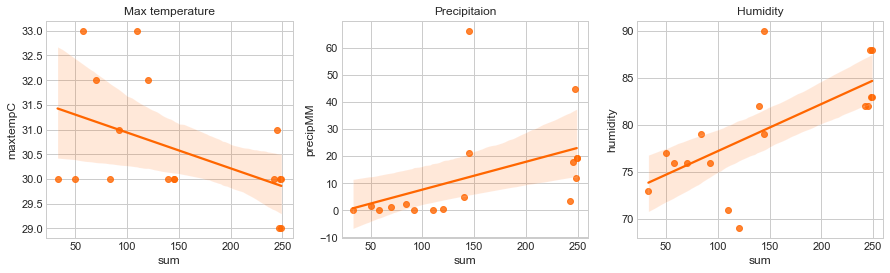

In [55]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=weather_case_panama['maxtempC'], x=weather_case_panama['sum'],color='#FF6600')
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=weather_case_panama['precipMM'], x=weather_case_panama['sum'],color='#FF6600')
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=weather_case_panama['humidity'], x=weather_case_panama['sum'],color='#FF6600')
axes[2].set_title('Humidity')

<AxesSubplot:>

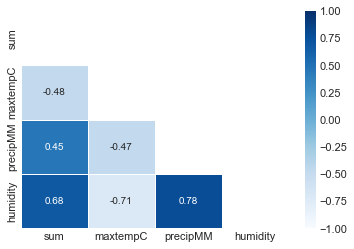

In [66]:
matrix = np.triu(weather_case_panama.corr())
sns.heatmap(weather_case_panama.corr(),annot=True,vmax=1,vmin=-1, mask=matrix, linewidths=.5 , cmap='Blues')
# sns.heatmap(weather_case_panama.corr(),cmap='Blues',annot=True,vmax=1,vmin=-1, linewidths=.5) 

In Panama, number of cases are affected by humidity and slightly in precipitated areas.

# 3. Virgin Islands

In [18]:
virgin_islands_weather = weather[weather['location'] == 'Virgin_Islands']
virgin_islands_weather.head()

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,sunset,DewPointC,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,year,month
6872,2016-02-24,27,26,0.0,11.6,7,83,08:05 PM,07:47 AM,06:41 AM,06:22 PM,22,29,29,27,36,29,76,0.4,1017,27,10,100,26,Virgin_Islands,2016,2
6873,2016-02-25,27,26,0.0,11.6,6,75,08:53 PM,08:24 AM,06:40 AM,06:23 PM,22,29,29,26,32,36,76,1.4,1017,27,10,92,23,Virgin_Islands,2016,2
6874,2016-02-26,27,26,0.0,11.6,6,68,09:41 PM,09:01 AM,06:40 AM,06:23 PM,21,28,28,26,29,28,74,1.5,1017,27,10,91,21,Virgin_Islands,2016,2
6875,2016-02-27,27,25,0.0,11.6,7,60,10:29 PM,09:40 AM,06:39 AM,06:23 PM,21,28,28,26,22,33,73,0.1,1016,27,10,95,16,Virgin_Islands,2016,2
6876,2016-02-28,27,25,0.0,11.6,6,53,11:18 PM,10:19 AM,06:38 AM,06:24 PM,21,28,28,26,19,14,73,8.6,1016,27,9,105,14,Virgin_Islands,2016,2


In [19]:
virgin_islands_weather = virgin_islands_weather[['date_time','maxtempC','precipMM','humidity']]
virgin_islands_weather

,date_time,maxtempC,precipMM,humidity
6872,2016-02-24,27,0.4,76
6873,2016-02-25,27,1.4,76
6874,2016-02-26,27,1.5,74
6875,2016-02-27,27,0.1,73
6876,2016-02-28,27,8.6,73
...,...,...,...,...
7415,2017-08-20,29,19.8,80
7416,2017-08-21,29,3.0,79
7417,2017-08-22,29,1.1,80
7418,2017-08-23,29,0.5,77


In [20]:
vi_zika = zika[zika["location"].str.startswith("United_States_Virgin_Islands")]
viLocal = vi_zika[vi_zika['data_field'] == 'zika_reported']
vi_monthly = viLocal.groupby(['report_date']).cases.agg([sum])
vi_monthly = vi_monthly.reset_index()
vi_monthly = vi_monthly.rename(columns={"report_date": "date_time"})
vi_monthly.head()

,date_time,sum
0,2016-02-16,122
1,2016-02-23,198
2,2016-03-01,72
3,2016-03-08,150
4,2016-03-15,188


In [21]:
weather_case_vi = pd.merge(vi_monthly,virgin_islands_weather, on=['date_time'], how='left') 
weather_case_vi

,date_time,sum,maxtempC,precipMM,humidity
0,2016-02-16,122,NaN,NaN,NaN
1,2016-02-23,198,NaN,NaN,NaN
2,2016-03-01,72,27.0,0.7,75.0
3,2016-03-08,150,26.0,4.5,77.0
4,2016-03-15,188,26.0,0.3,78.0
...,...,...,...,...,...
67,2017-08-09,4360,29.0,2.6,80.0
68,2017-08-15,4360,30.0,0.8,79.0
69,2017-08-22,4364,29.0,1.1,80.0
70,2017-08-29,4378,NaN,NaN,NaN


Text(0.5, 1.0, 'Humidity')

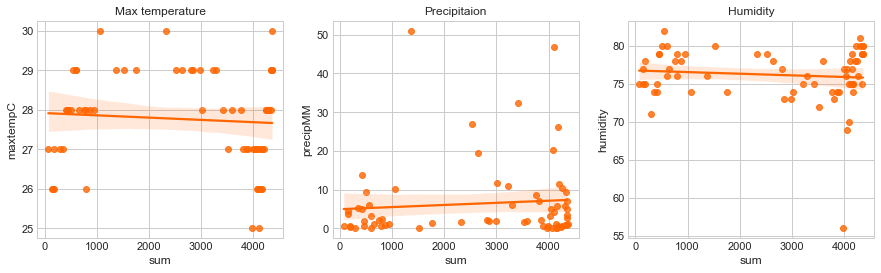

In [58]:
fig, axes = plt.subplots(1,3, figsize=(15, 4))
sns.regplot(ax=axes[0],y=weather_case_vi['maxtempC'], x=weather_case_vi['sum'],color='#FF6600')
axes[0].set_title('Max temperature')
sns.regplot(ax=axes[1],y=weather_case_vi['precipMM'], x=weather_case_vi['sum'],color='#FF6600')
axes[1].set_title('Precipitaion')
sns.regplot(ax=axes[2],y=weather_case_vi['humidity'], x=weather_case_vi['sum'],color='#FF6600')
axes[2].set_title('Humidity')

<AxesSubplot:>

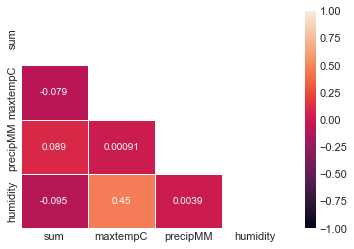

In [64]:
matrix = np.triu(weather_case_vi.corr())
sns.heatmap(weather_case_vi.corr(),annot=True,vmax=1,vmin=-1, mask=matrix, linewidths=.5)

In Virgin Islands, there is not much effect on number of cases with humitdiy or precipitation.

# To conclude:
In the preceding three countries, we see that number of cases are more or less affected by weather. Precipitation plays an important role in it.